# Under- and overfitting, model selection

## Preliminaries

In the first set of exercises you had to implement the training and evaluation of the linear regression and $k$-NN methods from scratch in order to practice your `numpy` skills. From this set of exercises onward, you can use the implementations provided in `scikit-learn` or other higher-level libraries. We start this set of exercises by demonstrating some of the features of `scikit-learn`.

For example, implementation of linear regression model fitting with an analytical solution for the parameters is provided by the class `sklearn.linar_model.LinearRegression`. You can train a linear regression model in the following way:

In [3]:
import numpy as np
from sklearn import datasets, linear_model

# load the diabetes dataset
diabetes = datasets.load_diabetes()

# use only one feature
X = diabetes.data[:, np.newaxis, 2]
y = diabetes.target

# split the data into training/testing sets
X_train = X[:-20]
X_test = X[-20:]

# split the targets into training/testing sets
y_train = y[:-20]
y_test = y[-20:]

# create linear regression object
model = linear_model.LinearRegression()

# train the model using the training dataset
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Let's visualize the training dataset and the learned regression model.

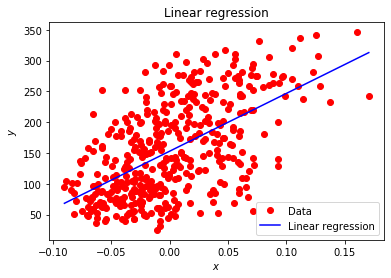

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure()
plt.plot(X_train, y_train, 'r.', markersize=12)
X_edge = np.array([np.min(X_train, 0), np.max(X_train, 0)])
plt.plot(X_edge, model.predict(X_edge), 'b-')
plt.legend(('Data', 'Linear regression'), loc='lower right')
plt.title('Linear regression')import numpy as np
from sklearn import datasets, linear_model

# load the diabetes dataset
diabetes = datasets.load_diabetes()

# use only one feature
X = diabetes.data[:, np.newaxis, 2]
y = diabetes.target

# split the data into training/testing sets
X_train = X[:-20]
X_test = X[-20:]

# split the targets into training/testing sets
y_train = y[:-20]
y_test = y[-20:]

# create linear regression object
model = linear_model.LinearRegression()

# train the model using the training dataset
model.fit(X_train, y_train)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

Once trained, the model can be used to make predictions on the test data:

In [5]:
# Make predictions using the testing dataset
prediction = model.predict(X_test)

The next step (not shown here) is to evaluate the performance of the trained model.

Note that the `scikit-learn` interface works by first initializing an object from the class that implements the machine learning model (linear regression in this case) and then fitting the initialized model using the data in the training set. Finally, the trained (fitted) model can be used to make predictions on unseen data. In fact, all models implemented in this library follow the same *initialize-fit-predict* programming interface. For example, a $k$-NN classifier can be trained in the following way:

In [6]:
from sklearn.model_selection import train_test_split
from sklearn import datasets, neighbors

breast_cancer = datasets.load_breast_cancer()

X = breast_cancer.data
y = breast_cancer.target

# make use of the train_test_split() utility function instead
# of manually dividing the data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=40)

# initialize a 3-NN classifier
model = neighbors.KNeighborsClassifier(n_neighbors=3)

# train the model using the training dataset
model.fit(X_train, y_train)

# make predictions using the testing dataset
prediction = model.predict(X_test)

Note that the features in the breast cancer dataset have different scales (some have on average very small absolute values, and some very large), which means that the distance metric used by $k$-NN will me dominated by the features with large values. You can use any of the number of feature transformation methods implemented in `scikit-learn` to scale the features. For example, you can use the `sklearn.preprocessing.StandardScaler` method to transform all features to a have a zero mean and unit variance:

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)

The scaler has its own parameters which are the means and standard deviations of the features estimated from the training set. If you train a model with the scaled features, you will have to remember to also apply the scaling transformation every time you make a prediction on new unseen and unscaled data. This is somewhat prone to error. One option for making the code more robust is to create a processing pipeline that includes the scaling and $k$-NN models in a sequence:

In [8]:
from sklearn.pipeline import Pipeline

knn = neighbors.KNeighborsClassifier(n_neighbors=3)

model = Pipeline([
                 ("scaler", scaler),
                 ("knn", knn)
                ])

# train the model using the training dataset
model.fit(X_train, y_train)

# make predictions using the testing dataset
prediction = model.predict(X_test)


If you are curious, more information about the design of the `scikit-learn` application programming interface (API) can be found [in this paper](https://arxiv.org/pdf/1309.0238.pdf). 

## Exercises

### Bias-variance decomposition

Show that the mean squared error of the estimate of a parameter can be decomposed into an expression that includes both the bias and variance (Eq. 5.53-5.54 in "Deep learning" by Goodfellow et al.). 

\begin{align}
MSE(\hat{\theta}) & = E[(\hat{\theta} - \theta)^2] \\
& = E[(\hat{\theta}-E[\hat{\theta}]+E[\hat{\theta}]-\theta)^2] \\
& = E[(\hat{\theta}-E[\hat{\theta}])^2+2(\hat{\theta}-E[\hat{\theta}])(E[\hat{\theta}]-\theta)+(E[\hat{\theta}]-\theta)^2] \\
& = E[(\hat{\theta}-E[\hat{\theta}])^2]+E[2(\hat{\theta}-E[\hat{\theta}])(E[\hat{\theta}]-\theta)]+E[(E[\hat{\theta}]-\theta)^2] \\
& = E[(\hat{\theta}-E[\hat{\theta}])^2+2(E[\hat{\theta}]-\theta)E[\hat{\theta}-E[\hat{\theta}]]+(E[\hat{\theta}]-\theta)^2 &E[\hat{\theta}]-\theta = constant \\
& = E[(\hat{\theta}-E[\hat{\theta}])^2]+2(E[\hat{\theta}]-\theta)(E[\hat{\theta}]-E[\hat{\theta}])+(E[\hat{\theta}]-\theta)^2 &E[\hat{\theta}] = constant \\
& = E[(\hat{\theta}-E[\hat{\theta}])^2] + (E[\hat{\theta}]-\theta)^2 \\
& = Var(\hat{\theta}) + Bias(\hat{\theta},\theta)^2 \\
\end{align}


### Polynomial regression

For this exercise we will be using generated data to better show the effects of the different polynomial orders.
The data is created using the make_polynomial_regression function.

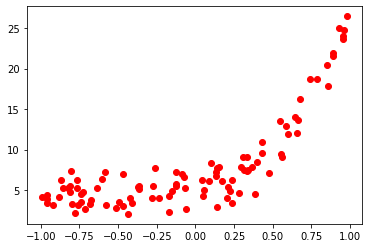

In [9]:
import numpy as np

%matplotlib inline

def generate_dataset(n=100, degree=1, noise=1, factors=None):
    # Generates a dataset by adding random noise to a randomly
    # generated polynomial function.
    
    x = np.random.uniform(low=-1, high=1, size=n)
    
    factors = np.random.uniform(0, 10, degree+1)
    
    y = np.zeros(x.shape)
    
    for idx in range(degree+1):
        y += factors[idx] * (x ** idx)

    # add noise
    y += np.random.normal(-noise, noise, n)
    
    return x, y

# load generated data
np.random.seed(0)

X, y = generate_dataset(n=100, degree=4, noise=1.5)

plt.plot(X, y, 'r.', markersize=12)

Implement polynomial regression using the `sklearn.preprocessing.PolynomialFeatures` transformation. Using the `sklearn.grid_search.GridSearchCV` class, perform a grid search of the polynomial order hyperparameter space with cross-validation and report the performance on an independent test set.

Plot a learning curve that show the validation accuracy as a function of the polynomial order. 

<p><font color='#770a0a'>Which models have a high bias, and which models have high variance? Motivate your answer.</font><p>
    
Repeat this experiment, this time using the diabetes dataset instead of the generated data.

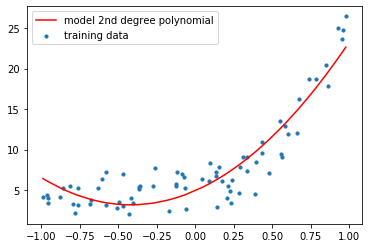

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import operator

#%% split data in train and test
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=40)

#%% 
X_train = X_train[:,np.newaxis]
y_train = y_train[:, np.newaxis]
X_test = X_test[:,np.newaxis]
y_test = y_test[:,np.newaxis]

poly = PolynomialFeatures(degree=2)     
X_poly = poly.fit_transform(X_train)
pol = LinearRegression()
pol.fit(X_poly, y_train)
y_poly_pred = pol.predict(X_poly)

plt.scatter(X_train, y_train, s=10, label='training data') #waardes data plotten
#soorteren x waardes voor plotten
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X_train,y_poly_pred), key=sort_axis)
X_train2, y_poly_pred = zip(*sorted_zip)
#regressie plotten
plt.plot(X_train2, y_poly_pred, color='r', label='model 2nd degree polynomial')
plt.legend(loc = 'upper left')
plt.show()




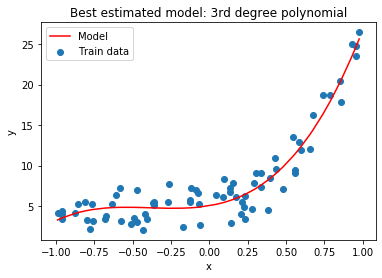

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

param = {'polynomialfeatures__degree':np.arange(20)}
grid = GridSearchCV(PolynomialRegression(), param, cv = 5)  #find the optimum degree, 5-fold cross-validation
grid.fit(X_train,y_train)
values  = grid.cv_results_ #results
mean_test_score = values['mean_test_score']

polymodel = grid.best_estimator_   #the model with the best estimator
performance = polymodel.score(X_test,y_test) #performance score on the independent test set
y_predicted = polymodel.fit(X_train,y_train).predict(X_train)
sorted_zip = sorted(zip(X_train,y_predicted), key=operator.itemgetter(0))
X_train_plt, y_predicted_plt = zip(*sorted_zip)

plt.scatter(X_train,y_train, label='Train data')
plt.plot(X_train_plt,y_predicted_plt,'r-',markersize=10, label= 'Model')
plt.title('Best estimated model: 3rd degree polynomial')
plt.legend(loc = 'upper left')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

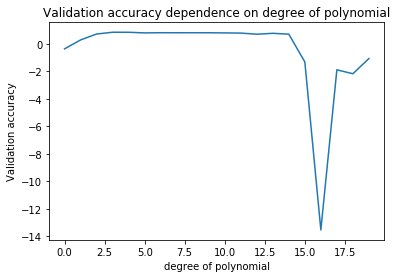

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)
The optimum degree polynomial that fits this data is 3, with mean test score 0.854401015192902
The accuracy on the independent test set for degree = 3 is 0.9664253189745748


In [19]:
plt.plot(np.arange(20),values['mean_test_score'])
plt.title('Validation accuracy dependence on degree of polynomial')
plt.xlabel('degree of polynomial')
plt.ylabel('Validation accuracy')
plt.show()
print(polymodel)
print ("The optimum degree polynomial that fits this data is 3, with mean test score {}".format(mean_test_score[3]))
print("The accuracy on the independent test set for degree = 3 is {}".format(performance))

The models with a polynomial degree lower than the optimum (degree < 3) have a high bias. Low polynomial orders are insufficient to describe the data in a generalized manner. Using such few polynomials would result in underfitting.
The models with a polynomial degree highger than the optimum (degree > 3) have a high variance. High polynomial orders describe the train data very well, but are too specific such that the model cannot be applied to and predict new data, because it is overfitted. The model should contain less polynomials to be more generalized. 

NOTE: In the following code polynomial orders are taken 0 to 5 and not to 20, to reduce the running time.
Other ways of reducing running time, but still trying more polynomial degrees (for example 10, which will run for approx. 1 min) are: N-fold cross validation less than 4 could or decreasing the size of the training data set. However, generally, a higher cross-validation fold is beneficial for finding the right hyperparameter (degree polynomial) and a big training dataset increases the accuracy of the model.

C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Time:  1.1221940999998878


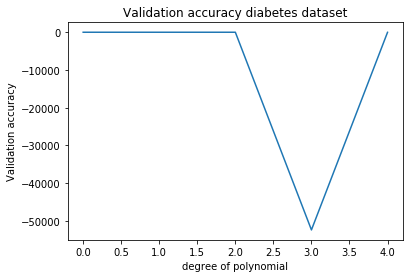

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomialfeatures',
                 PolynomialFeatures(degree=1, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)
The optimum degree polynomial that fits this data is 1, with mean test score 0.4870214546087291
The accuracy on the independent test set for degree = 1 is 0.46530269085349907


In [36]:
diabetes = datasets.load_diabetes()
Xdb = diabetes.data[:]
ydb = diabetes.target[:]
Xdb_train, Xdb_test, ydb_train, ydb_test = train_test_split(Xdb, ydb,test_size=0.20, random_state=30) #test_size may be changed

def PolynomialRegression_db(degree=2, **kwargs):
    return make_pipeline(StandardScaler(), PolynomialFeatures(degree), LinearRegression(**kwargs))
poldegrees = 5 #define the polynomial degrees that are validated
param = {'polynomialfeatures__degree':np.arange(poldegrees)}  
grid_db = GridSearchCV(PolynomialRegression_db(), param, cv = 4)  #find the optimum degree, n-fold cross-validation (cv)

import timeit
start = timeit.default_timer()

grid_db.fit(Xdb_train,ydb_train)

stop = timeit.default_timer()
print('Time: ', stop - start) 

values_db  = grid_db.cv_results_ #results
mean_test_score_db = values_db['mean_test_score']
polymodel_db = grid_db.best_estimator_   #the model with the best estimator
performance_db = polymodel_db.score(Xdb_test,ydb_test)

plt.plot(np.arange(poldegrees),values_db['mean_test_score'])
plt.title('Validation accuracy diabetes dataset')
plt.xlabel('degree of polynomial')
plt.ylabel('Validation accuracy')
plt.show()
print(polymodel_db)
print ("The optimum degree polynomial that fits this data is 1, with mean test score {}".format(mean_test_score_db[1]))
print("The accuracy on the independent test set for degree = 1 is {}".format(performance_db))

### ROC curve analysis
A common method to evaluate binary classifiers is the receiver operating characteristic (ROC) curve. Similar to the week one practicals, implement a $k$-NN classifier on the breast cancer dataset, however, his time use the $k$-NN pipeline from the preliminary. Train the model for different values of $k$ and evaluate their respective performance with an ROC curve, use the `sklearn.metrics.roc_curve` function.

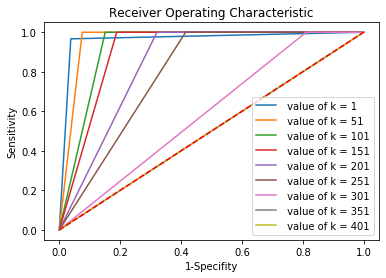

In [14]:
import sys
sys.path.append('code/')
from code_week2 import *

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import datasets, neighbors
from sklearn.pipeline import Pipeline
from sklearn import metrics
import matplotlib.pyplot as plt

breast_cancer = datasets.load_breast_cancer()

X = breast_cancer.data
y = breast_cancer.target
scaler = StandardScaler()

# make use of the train_test_split() utility function instead
# of manually dividing the data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=40)

#compute the mdoel for different k-values
for k in range(1,len(X_train)+1,50):      # the value of k needs always to be an odd number  
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    model = Pipeline([
                 ("scaler", scaler),
                 ("knn", knn)
                ])

    # train the model using the training dataset
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    
    #compute false positive rate and true positive rate
    fpr,tpr,tresholds = metrics.roc_curve(y_test, prediction, pos_label=1)
    #calculate the area under the curve
    auc = metrics.roc_auc_score(y_test,prediction)
    #plot the calculated values
    plt.plot(fpr,tpr, label=' value of k = ' +str(k))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('1-Specifity')
plt.ylabel('Sensitivity')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

### $F_1$ score and Dice similarity coefficient

The Dice similarity coefficient is a very popular evaluation measure for image segmentation applications. Assuming that $A$ is the ground truth segmentation of an object represented as a binary image, and $B$ is the binary output of an image segmentation method, the Dice similarity coefficient is computed as:

$\text{Dice}(A,B) = \frac{2|A\cap B|}{|A| + |B|}$

where $|\cdot|$ represents the cardinality of the objects (e.g. $|A|$ is the number of non-zero pixels in the ground truth segmentation).

For example, the Dice similarity can be computed in the following way:

The dice-score is =  0.3402777777777778


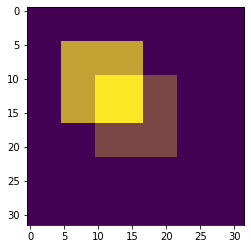

In [4]:
import numpy as np
import matplotlib.pyplot as plt
# generate some test objecys
A = np.zeros((32, 32))
A[10:-10, 10:-10] = 1
B = np.zeros((32, 32))
B[5:-15, 5:-15] = 1

dice = 2*np.sum(A*B)/(np.sum(A)+np.sum(B))

# display the results
plt.plot()
plt.imshow(A)
plt.imshow(B, alpha=0.7)

print('The dice-score is = ',dice)

<p><font color='#770a0a'>Show that the $F_1$ score, which is the harmonic mean of precision and recall, is equivalent to the Dice similarity coefficient</font><p>

In [9]:
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
A = np.zeros((32, 32))
A[10:-10, 10:-10] = 1
B = np.zeros((32, 32))
B[5:-15, 5:-15] = 1

print('The f1 score = ',f1_score(A,B,average='weighted'))

The f1 score =  0.3402777777777778


In [ ]:
A = ground_truth
B = predicted_values

Why are the dice-score and f1-score the same?
    f1         = 2 * (precision * recal) / (precision + recall)
               = 2 / ((precision/(precision * recal)) + (recal/(precision * recal))
               = 2 / (1/recal) + (1/precision)       
    wherein precision = |AB|/|B| and recal = |AB|/|A|
    if you write this in the f1 formula you get:
             f1= 2 / (|A|/|AB|) + (|B|/|AB|)
        
    
    dice_score = 2 * |AB| / (|A|+|B|)
               = 2 / ((|A|/|AB|) + (|B|/|AB|))
                      
So as you can see these two (f1 and dice-score) are the same formulas. 